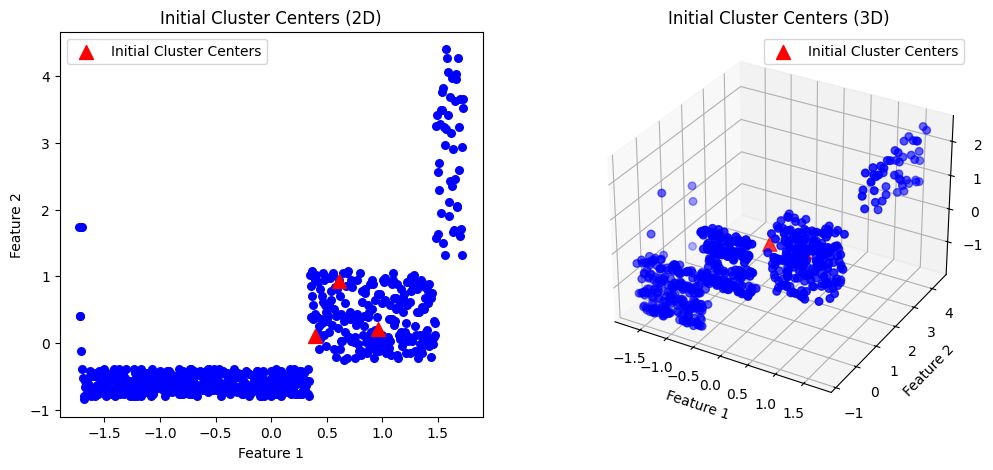

Iteration 1 - Cluster Centers:
[[0.95997239 0.21664496 0.69296324 0.84446863 0.27716697 0.40466203]
 [0.39373915 0.10134696 0.71506924 0.1032048  0.11260936 0.46636157]
 [0.60663125 0.93038163 0.40190172 0.03128005 0.24664966 0.07659975]]
Iteration 1 - Membership Matrix:
[[0.28777354 0.1893291  0.52289736]
 [0.51325301 0.39742857 0.08931843]
 [0.17613306 0.40291268 0.42095427]
 ...
 [0.11320033 0.07875627 0.80804339]
 [0.28351042 0.37519827 0.34129131]
 [0.70339655 0.04715579 0.24944765]]
--------------------------------------
Cluster Center Update Formula for Cluster 1 (Iteration 1):
cluster_centers[0] = np.sum((membership_mat[:,0]**2).reshape(-1,1) * data, axis=0) / np.sum(membership_mat[:,0]**2)
Result: [-0.00802947  0.00751495  0.08890971  0.04564559  0.04965812 -0.05450367]
Cluster Center Update Formula for Cluster 2 (Iteration 1):
cluster_centers[1] = np.sum((membership_mat[:,1]**2).reshape(-1,1) * data, axis=0) / np.sum(membership_mat[:,1]**2)
Result: [-0.01240506 -0.02350433 -0

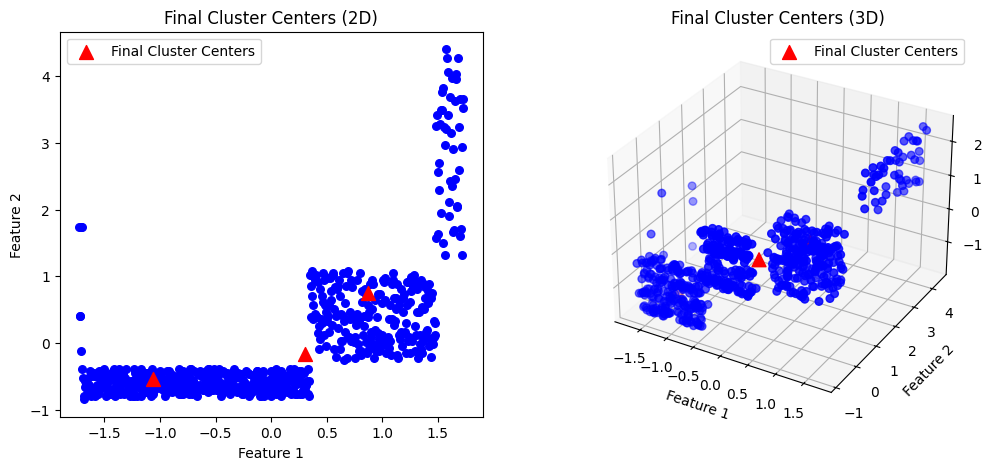

Final Cluster Centers:
[[ 0.87453761  0.75049     0.67340451  0.14720923 -0.01768415 -0.57743083]
 [-1.06214744 -0.53243326 -1.00547885 -0.89410799  0.36375485  1.12205329]
 [ 0.30078453 -0.16127187  0.36628721  0.75335    -0.42718862 -0.55482374]]

Final Cluster Assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Fuzzy C-Means Algorithm
def fuzzy_cmeans(data, n_clusters, fuzziness=2, max_iter=100, error=1e-5):
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(n_clusters, n_features)
    
    # Initialize membership matrix
    membership_mat = np.random.rand(n_samples, n_clusters)
    membership_mat /= np.sum(membership_mat, axis=1)[:, np.newaxis]
    
    # Plot initial cluster centers
    fig = plt.figure(figsize=(12, 5))
    
    # Plot 2D
    ax1 = fig.add_subplot(121)
    ax1.scatter(data[:, 0], data[:, 1], c='blue', marker='o', s=30)
    ax1.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='^', s=100, label='Initial Cluster Centers')
    ax1.set_title("Initial Cluster Centers (2D)")
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")
    ax1.legend()
    
    # Plot 3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', s=30)
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='^', s=100, label='Initial Cluster Centers')
    ax2.set_title("Initial Cluster Centers (3D)")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.set_zlabel("Feature 3")
    ax2.legend()
    
    plt.show()
    
    # Main loop
    for iter in range(max_iter):
        # Print cluster centers and membership matrix for first 10 iterations
        if iter < 10:
            print(f"Iteration {iter + 1} - Cluster Centers:")
            print(cluster_centers)
            print(f"Iteration {iter + 1} - Membership Matrix:")
            print(membership_mat)
            print("--------------------------------------")
        
        # Update cluster centers
        prev_cluster_centers = cluster_centers.copy()
        for j in range(n_clusters):
            cluster_centers[j] = np.sum((membership_mat[:,j]**fuzziness).reshape(-1,1) * data, axis=0) / np.sum(membership_mat[:,j]**fuzziness)
            if iter < 10:
                print(f"Cluster Center Update Formula for Cluster {j + 1} (Iteration {iter + 1}):")
                print(f"cluster_centers[{j}] = np.sum((membership_mat[:,{j}]**{fuzziness}).reshape(-1,1) * data, axis=0) / np.sum(membership_mat[:,{j}]**{fuzziness})")
                print(f"Result: {cluster_centers[j]}")
        
        # Update membership matrix
        for i in range(n_samples):
            for j in range(n_clusters):
                distances = np.linalg.norm(data[i] - cluster_centers[j])
                membership_mat[i, j] = 1 / sum((distances / np.linalg.norm(data[i] - cluster_centers[k])) ** (2 / (fuzziness - 1)) for k in range(n_clusters))
                if iter < 10:
                    print(f"Membership Matrix Update Formula for Data Point {i + 1} and Cluster {j + 1} (Iteration {iter + 1}):")
                    print(f"distances = np.linalg.norm(data[{i}] - cluster_centers[{j}])")
                    print(f"membership_mat[{i}, {j}] = 1 / sum((distances / np.linalg.norm(data[{i}] - cluster_centers[k])) ** (2 / ({fuzziness} - 1)) for k in range({n_clusters}))")
                    print(f"Result: {membership_mat[i, j]}")
        
        # Check for convergence
        if np.linalg.norm(cluster_centers - prev_cluster_centers) < error:
            break
    
    # Plot final cluster centers
    fig = plt.figure(figsize=(12, 5))
    
    # Plot 2D
    ax1 = fig.add_subplot(121)
    ax1.scatter(data[:, 0], data[:, 1], c='blue', marker='o', s=30)
    ax1.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='^', s=100, label='Final Cluster Centers')
    ax1.set_title("Final Cluster Centers (2D)")
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")
    ax1.legend()
    
    # Plot 3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', s=30)
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='^', s=100, label='Final Cluster Centers')
    ax2.set_title("Final Cluster Centers (3D)")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.set_zlabel("Feature 3")
    ax2.legend()
    
    plt.show()
    
    return cluster_centers, membership_mat

# Load data
url = "https://github.com/nendynailula/fuzzy-cmeans/blob/main/Credit%20Card%20Customer%20Data.csv?raw=true"
df = pd.read_csv(url)

# Drop the 'Customer Key' column
df.drop('Customer Key', axis=1, inplace=True)

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Set hyperparameters
n_clusters = 3
fuzziness = 2
max_iter = 100
error = 1e-5

# Apply Fuzzy C-Means
cluster_centers, membership_mat = fuzzy_cmeans(data_scaled, n_clusters, fuzziness, max_iter, error)

# Get cluster assignments
labels = np.argmax(membership_mat, axis=1)

print("Final Cluster Centers:")
print(cluster_centers)
print("\nFinal Cluster Assignments:")
print(labels)
